In [95]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
dataset = pd.read_csv('data.csv')

In [97]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<AxesSubplot:>

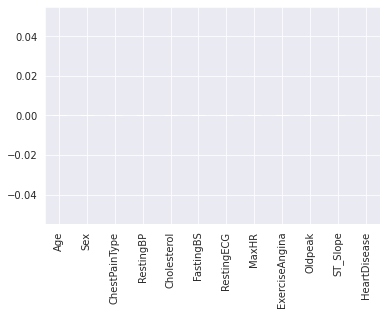

In [98]:
dataset.isnull().sum().plot.bar()

In [99]:
# Hence From the above graph we can observe our dataset donot have null values

In [100]:
dataset['ExerciseAngina'].unique()


array(['N', 'Y'], dtype=object)

In [101]:
dataset['ExerciseAngina'].replace('N', 0, inplace = True)
dataset['ExerciseAngina'].replace('Y', 1, inplace = True)

In [102]:
dataset['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [103]:
dataset['Sex'].unique()

array(['M', 'F'], dtype=object)

In [104]:
dataset['Sex'].replace('F', 0, inplace = True)
dataset['Sex'].replace('M', 1, inplace = True)

In [105]:
dataset['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [106]:
dataset['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [107]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0


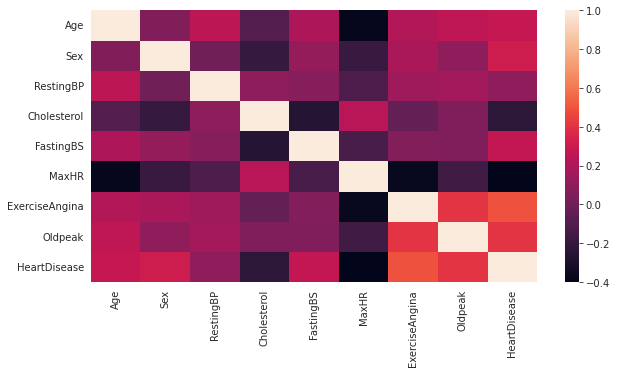

In [108]:
plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr());

In [109]:
dataset.corr()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
Age,1.000000,0.055750,0.254399,-0.095282,0.198039,-0.382045,0.215793,0.258612,0.282039
Sex,0.055750,1.000000,0.005133,-0.200092,0.120076,-0.189186,0.190664,0.105734,0.305445
RestingBP,0.254399,0.005133,1.000000,0.100893,0.070193,-0.112135,0.155101,0.164803,0.107589
Cholesterol,-0.095282,-0.200092,0.100893,1.000000,-0.260974,0.235792,-0.034166,0.050148,-0.232741
FastingBS,0.198039,0.120076,0.070193,-0.260974,1.000000,-0.131438,0.060451,0.052698,0.267291
MaxHR,-0.382045,-0.189186,-0.112135,0.235792,-0.131438,1.000000,-0.370425,-0.160691,-0.400421
ExerciseAngina,0.215793,0.190664,0.155101,-0.034166,0.060451,-0.370425,1.000000,0.408752,0.494282
Oldpeak,0.258612,0.105734,0.164803,0.050148,0.052698,-0.160691,0.408752,1.000000,0.403951
HeartDisease,0.282039,0.305445,0.107589,-0.232741,0.267291,-0.400421,0.494282,0.403951,1.000000


In [110]:
sns.set_style('darkgrid')

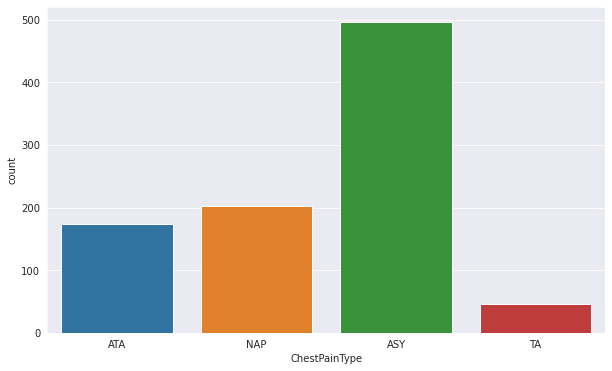

In [111]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ChestPainType', data=dataset);

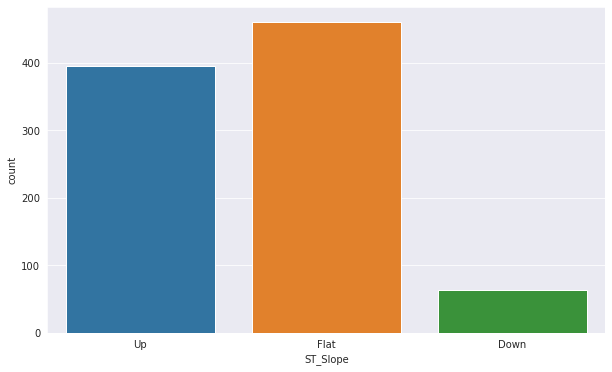

In [112]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ST_Slope', data=dataset);

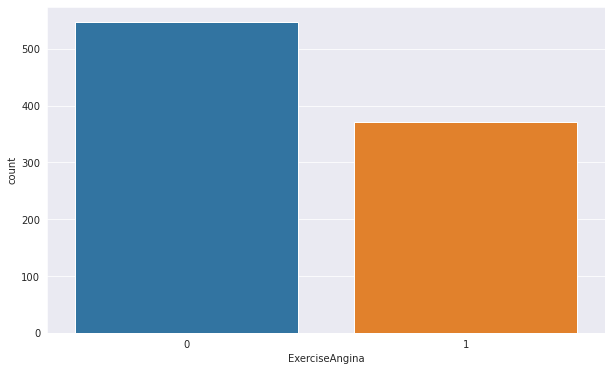

In [113]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ExerciseAngina', data=dataset);

In [114]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#classifier = SVC(kernel = 'rbf', random_state = 0)
#classifier = GaussianNB()
#classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [115]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 86.2+ KB


In [116]:
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,0,1.2,Flat,1
914,68,1,ASY,144,193,1,Normal,141,0,3.4,Flat,1
915,57,1,ASY,130,131,0,Normal,115,1,1.2,Flat,1
916,57,0,ATA,130,236,0,LVH,174,0,0.0,Flat,1


In [117]:
X = dataset.drop(columns=['HeartDisease'])
y = dataset['HeartDisease']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [118]:
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
852,43,1,ASY,120,177,0,LVH,120,1,2.5,Flat
121,52,0,NAP,125,272,0,Normal,139,0,0.0,Up
664,65,0,ASY,150,225,0,LVH,114,0,1.0,Flat
187,41,1,ASY,120,237,1,Normal,138,1,1.0,Flat
108,50,1,ASY,140,129,0,Normal,135,0,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
767,54,0,NAP,108,267,0,LVH,167,0,0.0,Up
72,52,1,ASY,120,182,0,Normal,150,0,0.0,Flat
908,63,1,ASY,140,187,0,LVH,144,1,4.0,Up
235,39,1,ATA,120,200,0,Normal,160,1,1.0,Flat


In [119]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 86.2+ KB


In [120]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['ChestPainType','RestingECG','ST_Slope'])
]
,remainder='passthrough')

In [121]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',SVC(kernel = 'linear', random_state = 0))
])

In [122]:
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

In [123]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 65   9]
 [  8 102]]


0.907608695652174

In [124]:
pipe1 = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',KNeighborsClassifier(n_neighbors = 20, metric = 'minkowski', p = 2))
])

In [125]:
pipe1.fit(X_train,y_train)
y_pred = pipe1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 67   7]
 [  7 103]]


0.9239130434782609

In [126]:

dataset.drop("Cholesterol",axis=1,inplace = True)

In [127]:
dataset.drop("MaxHR",axis=1,inplace = True)

In [128]:
dataset

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,0,Normal,0,0.0,Up,0
1,49,0,NAP,160,0,Normal,0,1.0,Flat,1
2,37,1,ATA,130,0,ST,0,0.0,Up,0
3,48,0,ASY,138,0,Normal,1,1.5,Flat,1
4,54,1,NAP,150,0,Normal,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,0,Normal,0,1.2,Flat,1
914,68,1,ASY,144,1,Normal,0,3.4,Flat,1
915,57,1,ASY,130,0,Normal,1,1.2,Flat,1
916,57,0,ATA,130,0,LVH,0,0.0,Flat,1


In [129]:
X = dataset.drop(columns=['HeartDisease'])
y = dataset['HeartDisease']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [130]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])
]
,remainder='passthrough')

In [131]:
pipe10 = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',KNeighborsClassifier(n_neighbors = 20, metric = 'minkowski', p = 2))
])

In [132]:
from sklearn.metrics import confusion_matrix, accuracy_score
pipe10.fit(X_train,y_train)
y_pred = pipe10.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 66   8]
 [  8 102]]


0.9130434782608695

In [133]:
pickle.dump(pipe10,open('HeartDisease_Prediction_using_KNN10.pkl','wb'))

In [134]:
X_test

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,ExerciseAngina,Oldpeak,ST_Slope
900,58,1,ASY,114,0,ST,0,4.4,Down
570,56,1,ASY,128,0,ST,1,2.0,Down
791,51,1,ASY,140,0,Normal,1,4.2,Flat
189,53,1,ASY,180,0,ST,1,1.5,Flat
372,63,1,ASY,185,0,Normal,1,0.0,Up
...,...,...,...,...,...,...,...,...,...
216,39,1,ASY,110,0,Normal,0,0.0,Flat
844,52,1,TA,118,0,LVH,0,0.0,Flat
740,54,0,NAP,160,0,Normal,0,0.0,Up
107,34,1,ATA,150,0,ST,0,0.0,Up


In [135]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1])